In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df['children'] = df['children'].fillna(0)

In [4]:
df['hotel'] = df['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

df['arrival_date_month'] = df['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [5]:
def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

In [6]:
df["is_family"] = df.apply(family, axis = 1)
df["total_customer"] = df["adults"] + df["children"] + df["babies"]

In [7]:
df = df.drop(columns = ['adults', 'babies', 'children', 'reservation_status_date', 'reservation_status', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month'])

In [8]:
#drop null rows for column "Country"

df.dropna(subset=['country'],inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 26 columns):
hotel                             118902 non-null int64
is_canceled                       118902 non-null int64
lead_time                         118902 non-null int64
arrival_date_month                118902 non-null int64
stays_in_weekend_nights           118902 non-null int64
stays_in_week_nights              118902 non-null int64
meal                              118902 non-null object
country                           118902 non-null object
market_segment                    118902 non-null object
distribution_channel              118902 non-null object
is_repeated_guest                 118902 non-null int64
previous_cancellations            118902 non-null int64
previous_bookings_not_canceled    118902 non-null int64
reserved_room_type                118902 non-null object
assigned_room_type                118902 non-null object
booking_changes                   118902 no

In [10]:
#columns to encode

# to_encode = ["deposit_type", "customer_type", "hotel" , "meal", 'country','market_segment',"distribution_channel",'assigned_room_type', 'reserved_room_type', "arrival_date_month"]
to_encode = ["meal", "country", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]

for column in df.columns:
    if column in to_encode:
        le = preprocessing.LabelEncoder()
        le.fit(df[column].astype(str))
        df[column]=le.transform(df[column])
        keys = le.classes_
        values = le.transform(le.classes_)
        dictionary = dict(zip(keys, values))
        print(dictionary)

{'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}
{'ABW': 0, 'AGO': 1, 'AIA': 2, 'ALB': 3, 'AND': 4, 'ARE': 5, 'ARG': 6, 'ARM': 7, 'ASM': 8, 'ATA': 9, 'ATF': 10, 'AUS': 11, 'AUT': 12, 'AZE': 13, 'BDI': 14, 'BEL': 15, 'BEN': 16, 'BFA': 17, 'BGD': 18, 'BGR': 19, 'BHR': 20, 'BHS': 21, 'BIH': 22, 'BLR': 23, 'BOL': 24, 'BRA': 25, 'BRB': 26, 'BWA': 27, 'CAF': 28, 'CHE': 29, 'CHL': 30, 'CHN': 31, 'CIV': 32, 'CMR': 33, 'CN': 34, 'COL': 35, 'COM': 36, 'CPV': 37, 'CRI': 38, 'CUB': 39, 'CYM': 40, 'CYP': 41, 'CZE': 42, 'DEU': 43, 'DJI': 44, 'DMA': 45, 'DNK': 46, 'DOM': 47, 'DZA': 48, 'ECU': 49, 'EGY': 50, 'ESP': 51, 'EST': 52, 'ETH': 53, 'FIN': 54, 'FJI': 55, 'FRA': 56, 'FRO': 57, 'GAB': 58, 'GBR': 59, 'GEO': 60, 'GGY': 61, 'GHA': 62, 'GIB': 63, 'GLP': 64, 'GNB': 65, 'GRC': 66, 'GTM': 67, 'GUY': 68, 'HKG': 69, 'HND': 70, 'HRV': 71, 'HUN': 72, 'IDN': 73, 'IMN': 74, 'IND': 75, 'IRL': 76, 'IRN': 77, 'IRQ': 78, 'ISL': 79, 'ISR': 80, 'ITA': 81, 'JAM': 82, 'JEY': 83, 'JOR': 84, 'JPN': 85, 'KAZ': 86, 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 26 columns):
hotel                             118902 non-null int64
is_canceled                       118902 non-null int64
lead_time                         118902 non-null int64
arrival_date_month                118902 non-null int64
stays_in_weekend_nights           118902 non-null int64
stays_in_week_nights              118902 non-null int64
meal                              118902 non-null int32
country                           118902 non-null int32
market_segment                    118902 non-null int32
distribution_channel              118902 non-null int32
is_repeated_guest                 118902 non-null int64
previous_cancellations            118902 non-null int64
previous_bookings_not_canceled    118902 non-null int64
reserved_room_type                118902 non-null int32
assigned_room_type                118902 non-null int32
booking_changes                   118902 non-null

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer
0,0,0,342,7,0,0,0,135,3,1,...,0,NaN,NaN,0,2,0.0,0,0,0,2.0
1,0,0,737,7,0,0,0,135,3,1,...,0,NaN,NaN,0,2,0.0,0,0,0,2.0
2,0,0,7,7,0,1,0,59,3,1,...,0,NaN,NaN,0,2,75.0,0,0,0,1.0
3,0,0,13,7,0,1,0,59,2,0,...,0,304.0,NaN,0,2,75.0,0,0,0,1.0
4,0,0,14,7,0,2,0,59,6,3,...,0,240.0,NaN,0,2,98.0,0,1,0,2.0


In [13]:
#encoding both agent and company code

df['agent_encoded'] = df['agent'].notnull()
df['company_encoded'] = df['company'].notnull()
df["agent_encoded"] = df["agent_encoded"].astype(int)
df["company_encoded"] = df["company_encoded"].astype(int)
df=df.drop(['agent','company'],axis = 1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 26 columns):
hotel                             118902 non-null int64
is_canceled                       118902 non-null int64
lead_time                         118902 non-null int64
arrival_date_month                118902 non-null int64
stays_in_weekend_nights           118902 non-null int64
stays_in_week_nights              118902 non-null int64
meal                              118902 non-null int32
country                           118902 non-null int32
market_segment                    118902 non-null int32
distribution_channel              118902 non-null int32
is_repeated_guest                 118902 non-null int64
previous_cancellations            118902 non-null int64
previous_bookings_not_canceled    118902 non-null int64
reserved_room_type                118902 non-null int32
assigned_room_type                118902 non-null int32
booking_changes                   118902 non-null

In [15]:
column_list=list(df.columns)
column_list.remove('is_canceled')

In [16]:
# features
X = df[column_list]

# target
y = df['is_canceled']

In [17]:
from sklearn.model_selection import train_test_split
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

## Basic XG Boost model

In [18]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

model = xgb.XGBClassifier()
search = GridSearchCV(model, param_grid=params, scoring='f1', cv=5)
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [19]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score


In [20]:
search.best_params_

{'colsample_bytree': 1.0,
 'gamma': 2,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.8}

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

model = xgb.XGBClassifier(colsample_bytree=1.0, gamma=2,max_depth=5, min_child_weight=1,subsample=0.8, random_state=420)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 86.59%
Precision: 84.53%
Recall: 78.43%
F1: 81.37%


In [22]:
import sklearn
from sklearn.metrics import roc_auc_score

y_proba = model.predict_proba(X_test)
roc_auc_score(y_test,np.transpose(y_proba)[1])

0.9420875330174399

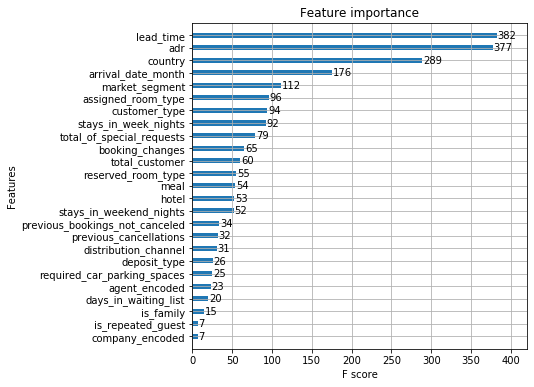

In [23]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
xgb.plot_importance(model, height=0.4, ax=ax)

### XG Boost with Scaling

In [25]:
# create copy of DF for scaling
X_scaled = X.copy()

In [26]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                    'previous_cancellations', 'previous_bookings_not_canceled',
                    'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                    'total_of_special_requests', 'total_customer']

remaining_columns = [x for x in X_scaled.columns if x not in columns_to_scale]


# Scale columns
scaler = StandardScaler()

X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale]) # to learn mean and standard dev to be used for scaling


In [27]:
# Train Test Split with Scaling
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=420)

In [28]:
model = xgb.XGBClassifier(colsample_bytree=1.0, gamma=2,max_depth=5, min_child_weight=1,subsample=0.8, random_state=420)
model.fit(X_scaled_train, y_train)
y_pred = model.predict(X_scaled_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 86.59%
Precision: 84.53%
Recall: 78.43%
F1: 81.37%


In [29]:
y_proba = model.predict_proba(X_scaled_test)
roc_auc_score(y_test,np.transpose(y_proba)[1])

0.9420875330174399

### XG Boost with Scaling and PCA

In [31]:
X_pca = X_scaled.copy()

In [32]:
from sklearn.decomposition import PCA

# 11 randomly chosen, might want to change number of principle components
n = 11 
pca = PCA(n_components=n, random_state=69)
pca_components = pca.fit_transform(X_pca)
print('explained var ratio', pca.explained_variance_ratio_)
print('sum', sum(pca.explained_variance_ratio_))

columns = []
for i in range(n):
    x = "pc" + str(i)
    columns.append(x)

# convert numpy array to dataframe
X_pca = pd.DataFrame(pca_components, columns=columns)
X_pca

explained var ratio [9.84661267e-01 4.71420598e-03 3.07917134e-03 1.23227590e-03
 7.51702092e-04 6.31532435e-04 5.56456504e-04 5.35484194e-04
 5.09631816e-04 4.93942207e-04 4.47154757e-04]
sum 0.9976128238380605


,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-42.034515,-0.376198,0.932633,-2.830173,1.186090,-0.605673,-1.304855,0.584428,0.775101,-2.213400,-3.153266
1,-42.037614,-0.554474,0.742330,-2.459376,2.844762,-1.680876,-1.464983,1.392002,1.814646,-3.295452,-4.412650
2,33.953359,-0.372435,-0.759516,-3.537941,-0.777114,-0.377454,-0.468921,-0.543039,-0.862095,0.189525,0.061694
3,33.937846,-0.372741,-2.191080,-4.289778,-0.389914,-0.231609,-0.551343,-0.334350,-0.053594,1.046735,0.107302
4,33.986321,-0.469003,-1.691806,0.544929,-1.318948,0.115069,0.397515,-0.778485,0.195386,-0.017526,-0.139974
5,33.986321,-0.469003,-1.691806,0.544929,-1.318948,0.115069,0.397515,-0.778485,0.195386,-0.017526,-0.139974
6,-42.026513,-0.289184,1.389691,-2.323425,-0.461578,-0.260196,-0.469983,-0.109942,-0.027620,1.110346,-0.024808
7,-42.018689,-0.306526,1.394714,-1.812839,-0.599253,0.494999,-0.519810,0.494639,-0.067230,0.885995,0.043424
8,-42.007890,-0.377285,-1.250490,1.357408,-0.702265,0.226809,0.386390,-0.861406,0.179223,-0.201876,-0.142596
9,-41.993078,-0.344078,2.611082,0.528291,-0.417010,-0.178497,-0.675388,1.073530,-1.469928,0.173639,0.301460


In [33]:
# Train Test Split with Scaling and PCA
X_pca_scaled_train, X_pca_scaled_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=420)

In [34]:
model = xgb.XGBClassifier(colsample_bytree=1.0, gamma=2,max_depth=5, min_child_weight=1,subsample=0.8, random_state=420)
model.fit(X_pca_scaled_train, y_train)
y_pred = model.predict(X_pca_scaled_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 84.29%
Precision: 82.65%
Recall: 73.30%
F1: 77.70%


In [35]:
y_proba = model.predict_proba(X_pca_scaled_test)
roc_auc_score(y_test,np.transpose(y_proba)[1])

0.9182632616535243